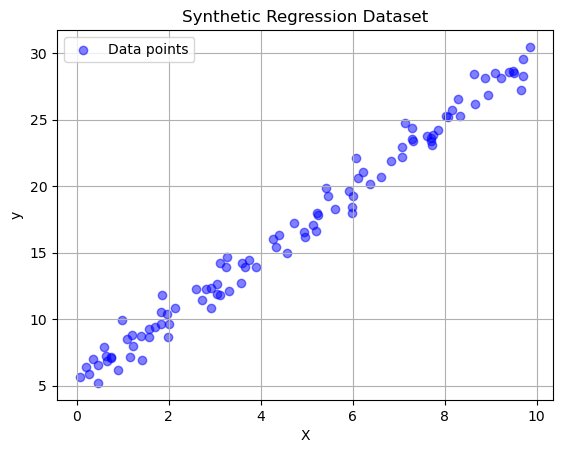

Initial Weight: 0.0130   Initial Bias: 1.4535
Epoch  10   Loss 3.6176
Epoch  20   Loss 3.3217
Epoch  30   Loss 3.0569
Epoch  40   Loss 2.8200
Epoch  50   Loss 2.6080
Epoch  60   Loss 2.4183
Epoch  70   Loss 2.2486
Epoch  80   Loss 2.0968
Epoch  90   Loss 1.9610
Epoch 100   Loss 1.8395


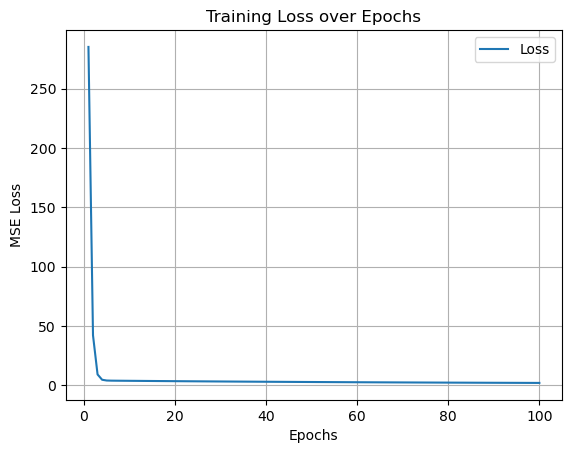

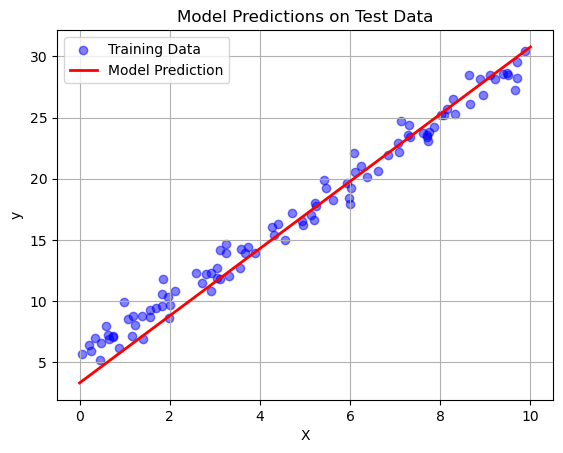

Final Weight: 2.7456   Final Bias: 3.3183


In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
n_samples  = 100
true_slope = 2.5
true_bias  = 5.0

X     = np.random.rand(n_samples, 1) * 10
noise = np.random.randn(n_samples, 1)
y     = true_slope * X + true_bias + noise

plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.title("Synthetic Regression Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


w = np.random.randn()
b = np.random.randn()
print(f"Initial Weight: {w:.4f}   Initial Bias: {b:.4f}")


def predict(X, w, b):
    return X * w + b

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, w, b, lr):
    n      = len(y)
    y_pred = predict(X, w, b)
    dw     = -2 * np.sum(X * (y - y_pred)) / n
    db     = -2 * np.sum(y - y_pred)       / n
    w     -= lr * dw
    b     -= lr * db
    return w, b


lr           = 0.01
n_epochs     = 100
loss_history = []

for epoch in range(1, n_epochs + 1):
    y_pred = predict(X, w, b)
    loss   = compute_loss(y, y_pred)
    loss_history.append(loss)
    w, b   = gradient_descent(X, y, w, b, lr)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:3d}   Loss {loss:.4f}")


plt.plot(range(1, n_epochs + 1), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()


X_test      = np.array([[0], [2], [4], [6], [9], [10]])
y_test_pred = predict(X_test, w, b)

plt.scatter(X, y, color="blue", alpha=0.5, label="Training Data")
plt.plot(X_test, y_test_pred, color="red", linewidth=2, label="Model Prediction")
plt.title("Model Predictions on Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Weight: {w:.4f}   Final Bias: {b:.4f}")


